<a href="https://colab.research.google.com/github/Kambey-san/ASIM/blob/HW_lesson_06/KAA_ASIM_HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладная статистика в медицине
## Урок 6. Регрессионные модели\ДЗ
На прошлых занятиях вы иногда формировали гипотезы, в которых ЗП была бинарной, а НП — непрерывной. Теперь вы можете проверить их корректно.

-Попробуйте сгенерировать несколько выборок из имеющихся данных (вы уже знаете как), создать регрессионные модели по выбору и протестировать их предиктивную способность на сгенерированных данных. Не забывайте про оценку качества и доверительные интервалы.

-Задание выполняется на языке R и предоставляется в Google Colab или PDF/html рендере Quarto.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
install.packages("skimr")
install.packages("psych")
install.packages("gridExtra")
install.packages("moments")
install.packages("fitdistrplus")
install.packages("data.table")
install.packages("car")
install.packages("rstatix")
install.packages("emmeans")
install.packages("ez")
install.packages("MASS")
install.packages("tidyr")
install.packages("simpleboot")
install.packages("coin")
install.packages("boot")
install.packages("jackknifeR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘li

In [2]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
library(ggplot2)
library(gplots)
library(skimr)
library(psych)
library(gridExtra)
library(moments)
library(car)
library(fitdistrplus)
library(rstatix)
library(emmeans)
library(ez)
library(MASS)
library(tidyr)
library(tibble)
library(dplyr)
library(simpleboot)
library(coin)
library(boot)
library(jackknifeR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘

In [14]:
descriptive <- read_xlsx('/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_01/metadata.xlsx', sheet = 2) %>%
  rename("Variable" = "...1", "Description" = "...2") %>%
  drop_na

descriptive

Variable,Description
<chr>,<chr>
Ht,growth
Wt,the weight
BMI,body mass index
Sys,Systolic blood pressure
Dia,Diastolic blood pressure
PR,pulse
Sm,smoking
Dm,diabetes
HT,hypertension


In [29]:
data <- read_xlsx("/content/drive/MyDrive/Data_since_in_Healthcare/ASIM/HW_02/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

New names:
• `Choi...25` -> `Choi...21`
• `Tgi...26` -> `Tgi...22`
• `HDLi...27` -> `HDLi...23`
• `LDLi...28` -> `LDLi...24`
• `Choi...29` -> `Choi...25`
• `Tgi...30` -> `Tgi...26`
• `HDLi...31` -> `HDLi...27`
• `LDLi...32` -> `LDLi...28`


Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [32]:
summary(data)

 Vial.number           Group                Age        Plasma.volume   
 Length:38          Length:38          Min.   :47.00   Min.   : 5.000  
 Class :character   Class :character   1st Qu.:60.25   1st Qu.: 6.500  
 Mode  :character   Mode  :character   Median :65.00   Median :10.250  
                                       Mean   :65.58   Mean   : 9.453  
                                       3rd Qu.:70.00   3rd Qu.:11.875  
                                       Max.   :83.00   Max.   :13.000  
                                                                       
       Ht              Wt              BMI             Sys       
 Min.   :150.0   Min.   : 56.50   Min.   :20.28   Min.   :100.0  
 1st Qu.:161.0   1st Qu.: 63.25   1st Qu.:23.00   1st Qu.:121.0  
 Median :165.0   Median : 72.50   Median :27.68   Median :132.0  
 Mean   :165.0   Mean   : 74.86   Mean   :27.55   Mean   :131.7  
 3rd Qu.:168.8   3rd Qu.: 83.50   3rd Qu.:30.29   3rd Qu.:136.8  
 Max.   :180.0   Max.   :111

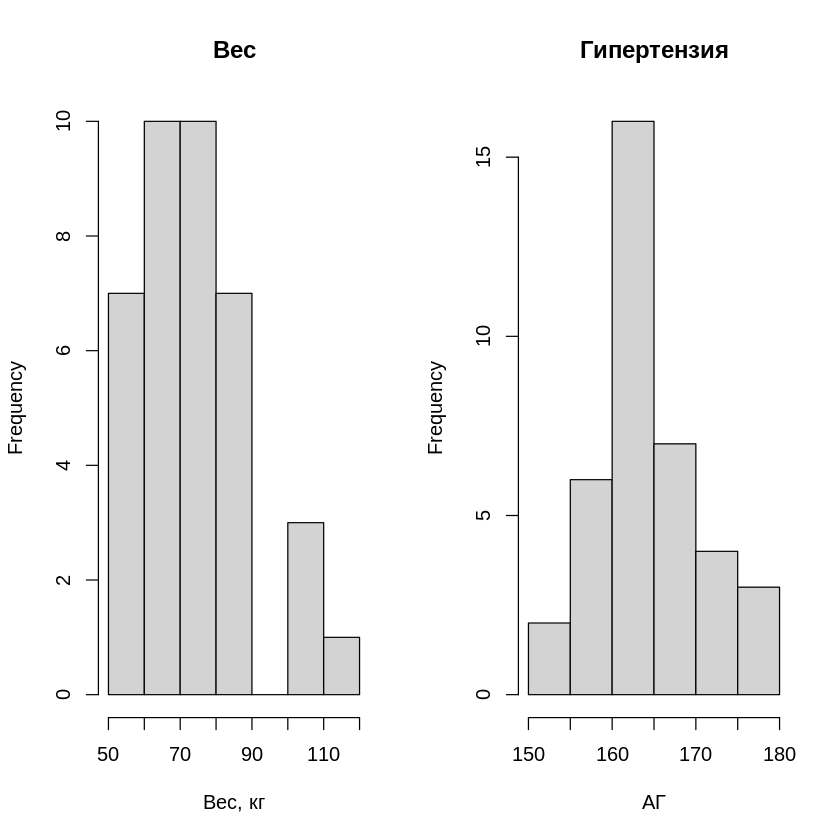

In [61]:
par(mfrow = c(1, 2)) # Расположение графиков
hist(data$Wt, main = "Вес", xlab = "Вес, кг")
hist(data$Ht, main = "Гипертензия", xlab = "АГ")

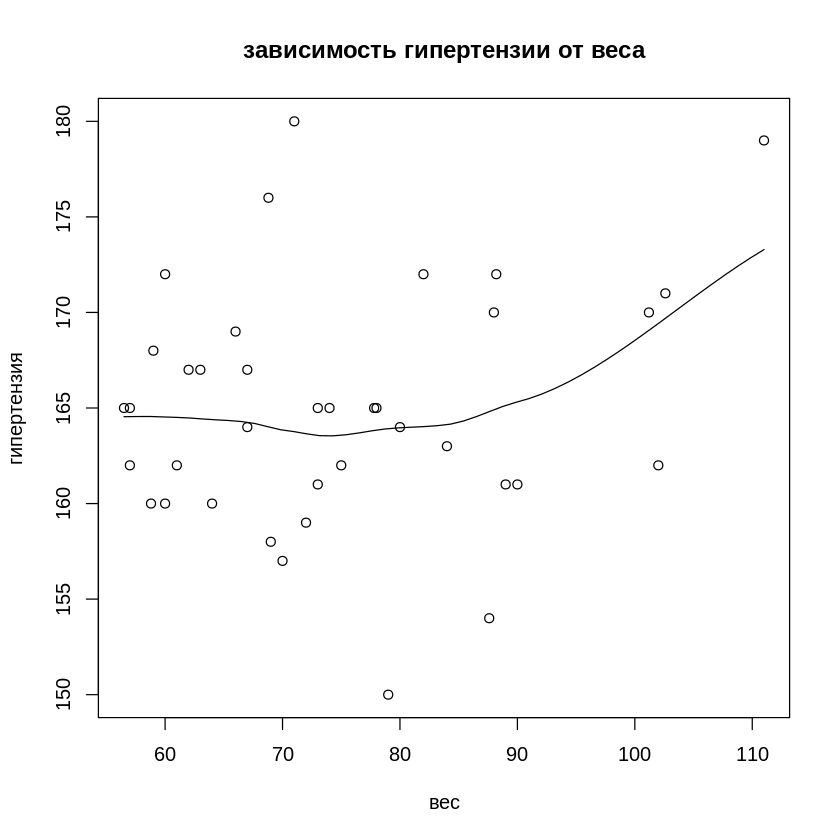

In [50]:
# Звисимость гипертензии от веса
scatter.smooth(x=data$Wt, y=data$Ht,
              main ='зависимость гипертензии от веса',
              xlab = "вес",
              ylab =  "гипертензия")

**Вывод:** функция нелинейная, тем не менее отмечается зависимость гипертензии от увеличения веса

In [53]:
summary(data$Wt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  56.50   63.25   72.50   74.86   83.50  111.00 

In [54]:
summary(data$Ht)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  150.0   161.0   165.0   165.0   168.8   180.0 

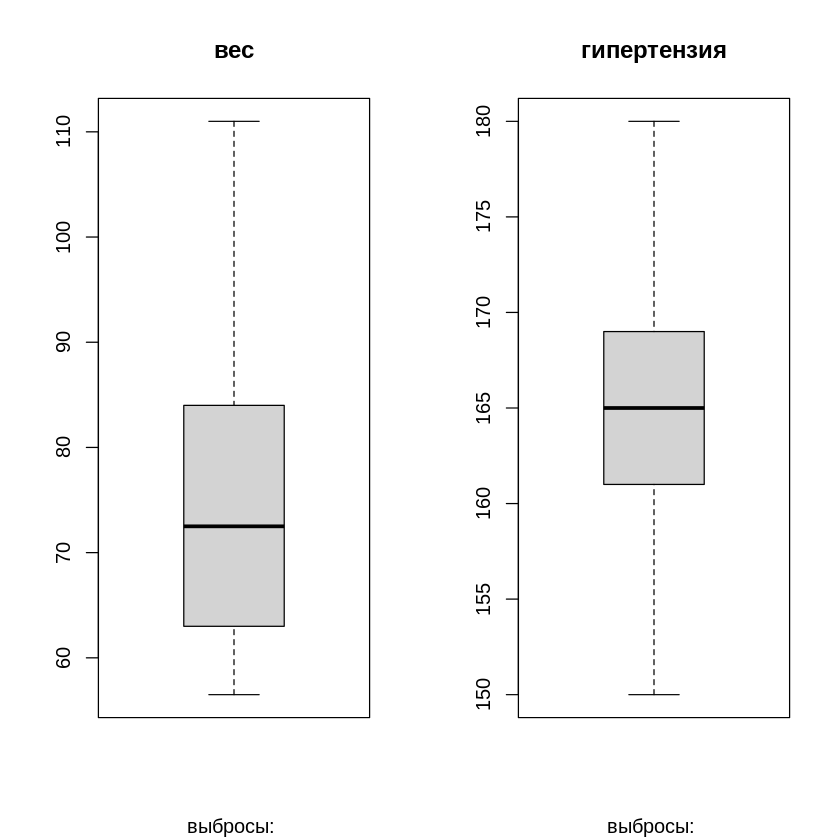

In [52]:
par(mfrow = c(1, 2)) # Расположение графиков
boxplot(data$Wt, main = "вес",
        sub=paste("выбросы:", boxplot.stats(data$Wt)$out))
boxplot(data$Ht, main = "гипертензия",
        sub=paste("выбросы:", boxplot.stats(data$Ht)$out))

**boxplot.stats** не показал выбросов

In [56]:
install.packages("e1071")   # для постороения графиков плотности распределения

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [57]:
library(e1071)


Attaching package: ‘e1071’


The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness




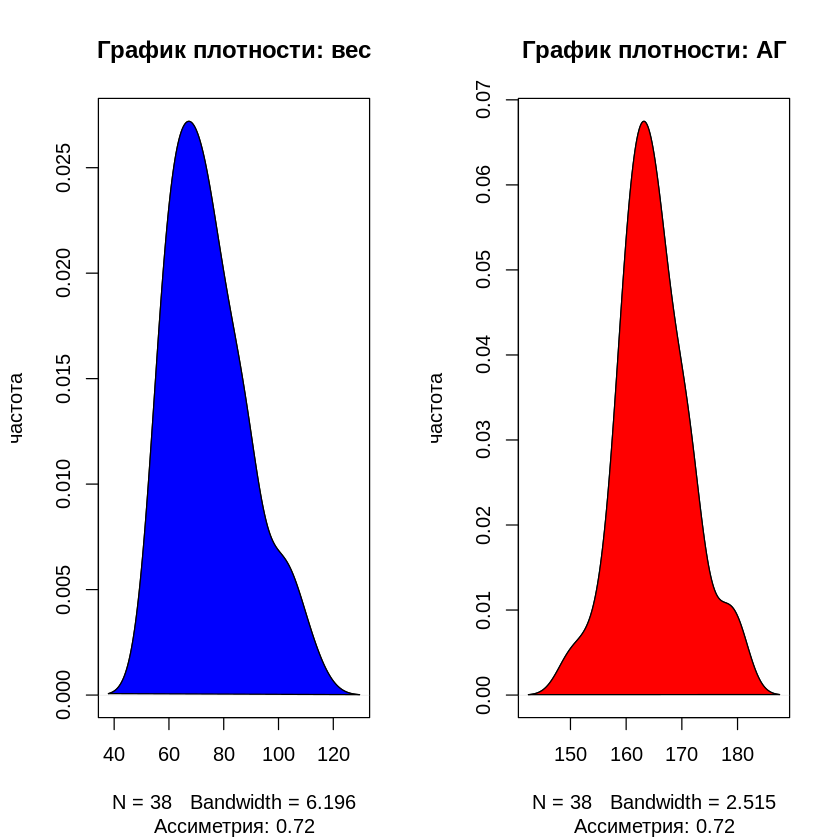

In [60]:
par(mfrow = c(1, 2)) # Расположение графиков
plot(density(data$Wt), main = "График плотности: вес", ylab = "частота", sub=paste("Ассиметрия:", round(e1071::skewness(data$Wt), 2)))
polygon(density(data$Wt), col = "blue")
plot(density(data$Ht), main = "График плотности: АГ", ylab = "частота", sub=paste("Ассиметрия:", round(e1071::skewness(data$Wt), 2)))
polygon(density(data$Ht), col = "red")

In [65]:
cor(data$Wt, data$Ht) # значние корреляции

[1] 0.1888851

**Вывод:** как и пердполагалось, корреляция слабенькая

Посторим простенькую модель

In [68]:
linearMod <- lm(Ht ~ Wt, data = data)
linearMod


Call:
lm(formula = Ht ~ Wt, data = data)

Coefficients:
(Intercept)           Wt  
   158.7421       0.0836  


In [69]:
modelSummary = summary(linearMod)
modelSummary


Call:
lm(formula = Ht ~ Wt, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3465  -3.8232  -0.2545   3.5291  15.3223 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 158.74212    5.51723  28.772   <2e-16 ***
Wt            0.08360    0.07244   1.154    0.256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.279 on 36 degrees of freedom
Multiple R-squared:  0.03568,	Adjusted R-squared:  0.008891 
F-statistic: 1.332 on 1 and 36 DF,  p-value: 0.2561


In [72]:
# коэф. детерминации
modelSummary$r.squared
modelSummary$adj.r.squared

[1] 0.03567757

[1] 0.008890834

In [73]:
# ост. дисперсия
modelSummary$sigma^2

[1] 39.43007

In [75]:
library(broom)
glance(linearMod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.03567757,0.008890834,6.279337,1.331912,0.2560696,1,-122.7084,251.4169,256.3296,1419.483,36,38


In [96]:
predictor_column <- "Wt"
modelCoeffs <- modelSummary$coefficients
# beta.estimate <- modelCoeffs[predictor_column, "Estimate"]
# std.error <- modelCoeffs[predictor_column, "Std. Error"]
# t_value <- beta.estimate/std.error  # t-stat
# p_value <- 2*pt(-abs(t_value), df=nrow(data$Wt)-ncol(data$Wt))
# f_statistic <- linearMod$fstatistic[1]
# f <-summary(linearMod)$fstatistic
# model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [93]:
beta.estimate <- modelCoeffs[predictor_column, "Estimate"]
beta.estimate

[1] 0.08359978

In [94]:
std.error <- modelCoeffs[predictor_column, "Std. Error"]
std.error

[1] 0.07243816

In [90]:
t_value <- beta.estimate/std.error  # t-stat
t_value

[1] 1.154085

In [91]:
f_statistic <- linearMod$fstatistic[1]
f_statistic

NULL

In [92]:
f <-summary(linearMod)$fstatistic
f

value     numdf     dendf 
 1.331912  1.000000 36.000000

In [97]:
model_p <- pf(f[1], f[2], f[3], lower=FALSE)

In [87]:
AIC(linearMod)
BIC(linearMod)

[1] 251.4169

[1] 256.3296

In [98]:
# проверка случайных остатков
linearMod$residuals
length(linearMod$residuals)

1            2            3            4            5            6 
 -2.76449798  10.97830799  -1.43009886  -3.65778355  15.32229915  -4.09250240 
           7            8            9           10           11           12 
 -0.34330174  -1.84170306 -15.34649908   5.88438295   4.32549649  -7.59410107 
          13           14           15           16           17           18 
 -3.84490041   6.40270158   2.99109738   1.49269605  -5.26929400   3.68054614 
          19           20           21           22           23           24 
  3.07469716   0.15509959   2.79758583  -6.51050130   4.74029804   1.53449594 
          25           26           27           28           29           30 
  3.90110291  -1.50730395   8.24189671  -3.75810329  -3.01209997  -0.24617935 
          31           32           33           34           35           36 
 11.50621866  -5.26609665  -0.26289930  -5.18249687   2.65669826  -5.76130063 
          37           38 
-12.06545718   0.07149981

[1] 38

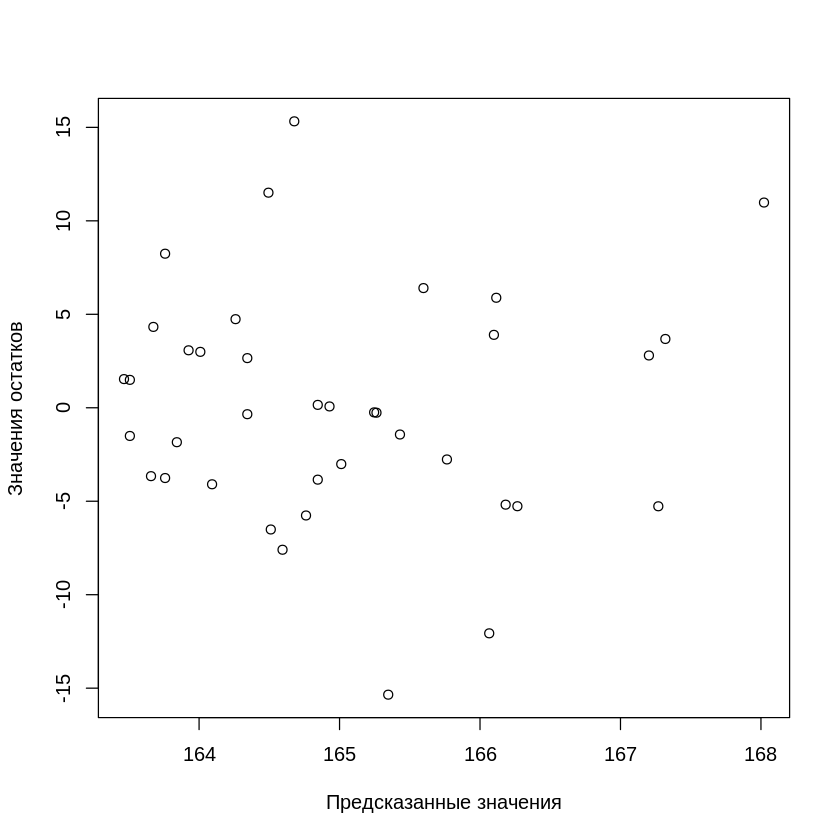

In [102]:
# par(mfrow = c(1, 1))
plot(linearMod$fitted.values, linearMod$residuals,
    xlab="Предсказанные значения", ylab="Значения остатков")

In [104]:
# проверка остатков на зависимость (нулев. мат. ожидание)
M = mean(linearMod$residuals)
M

[1] 5.940643e-18

In [105]:
SD = sd(linearMod$residuals, na.rm = FALSE)
SD

[1] 6.1939

In [107]:
# количество измерений
N = length(data$Ht)
N

[1] 38

In [108]:
# t_расчетн.
t_m <- -M/SD*sqrt(N)
t_m

[1] -5.912363e-18

In [109]:
# t_табличн (табличное значение распределения Стьюдента)
pval = 0.95
t_tab <- qt(pval, N-1)  # степ.свободы N-1
if (abs(t_m) < t_tab) {
  print("Принимаем гипотезу Н0 - мат.ожидание остатков равно нулю")
} else {
  print("Принимаем гипотезу Н1 с вероятностью", pval, "мат ожидание остатков отлично от нуля")
}

[1] "Принимаем гипотезу Н0 - мат.ожидание остатков равно нулю"


In [113]:
# проверка остатков на постоянство дисперсии (гомоскедастичность)
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [115]:
library(lmtest)
bptest(linearMod)


	studentized Breusch-Pagan test

data:  linearMod
BP = 1.1556, df = 1, p-value = 0.2824


При таком p-value высокая гетероскедастичность

In [116]:
# тест Спирмана
cor.test(data$Wt, linearMod$residuals, method = "spearman")

Warning message in cor.test.default(data$Wt, linearMod$residuals, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  data$Wt and linearMod$residuals
S = 9822.1, p-value = 0.6556
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.07475101 


значение p-value > 0,05 => гетероскедастичность есть

In [117]:
# автокорреляция остатков
bgtest(linearMod)
dwtest(linearMod)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  linearMod
LM test = 1.9147, df = 1, p-value = 0.1664



	Durbin-Watson test

data:  linearMod
DW = 2.4285, p-value = 0.9075
alternative hypothesis: true autocorrelation is greater than 0


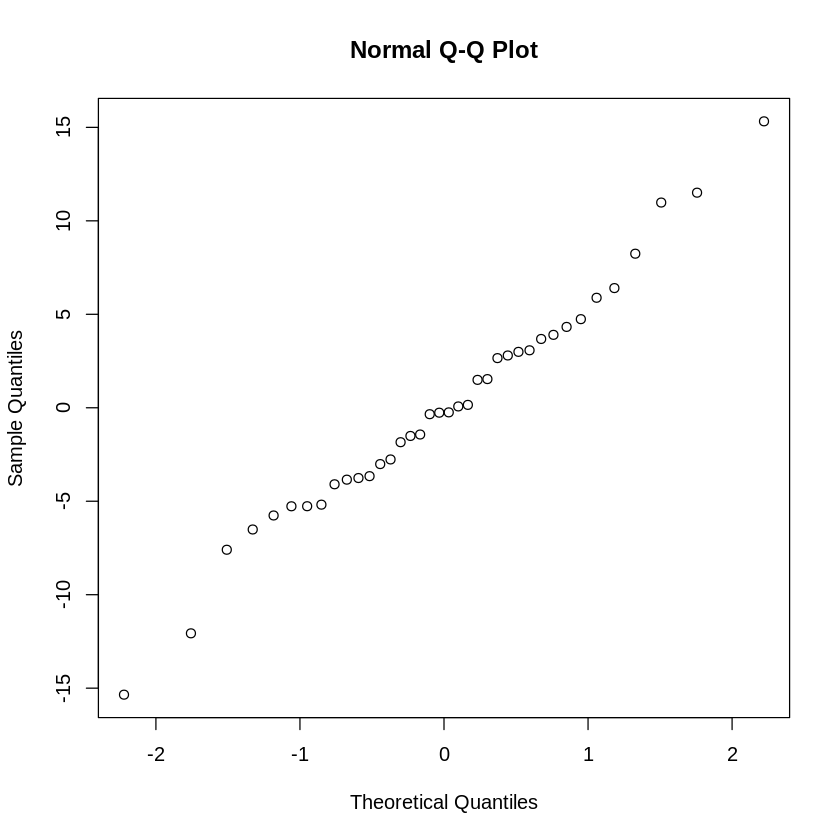

In [119]:
# проверка нормальности распределения остатков
qqnorm(linearMod$residuals)

In [121]:
install.packages("sm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [124]:
library(sm)

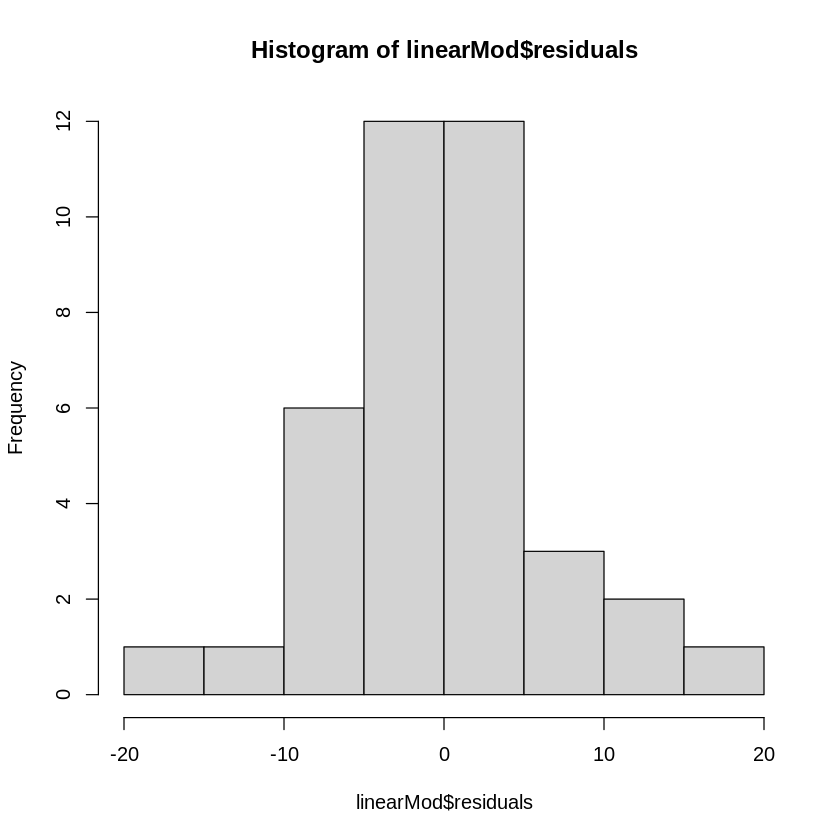

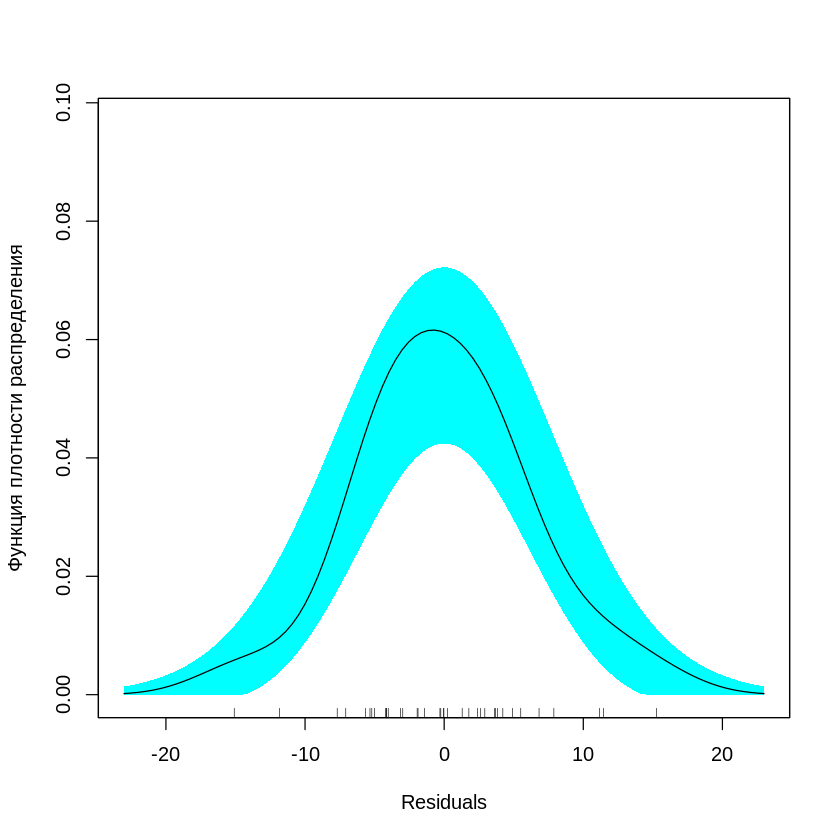

In [125]:
hist(linearMod$residuals)
sm.density(linearMod$residuals, model = "Normal",
           xlab = "Residuals", ylab = "Функция плотности распределения")

Остатки имеют нормальное распределение

In [127]:
# параметрические тесты
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [128]:
lillie.test(linearMod$residuals)
shapiro.test(linearMod$residuals[1:4990])


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  linearMod$residuals
D = 0.070882, p-value = 0.9005



	Shapiro-Wilk normality test

data:  linearMod$residuals[1:4990]
W = 0.98437, p-value = 0.8627


In [129]:
# разбиение данных на обучающую и тестовую выборки
set.seed(100)
trainingRowIndex <- sample(1:nrow(data), 0.8*nrow(data))
# trainingData <- data[trainingRowIndex, ]
# testData <- data[-trainingRowIndex, ]

In [130]:
trainingData <- data[trainingRowIndex, ]
trainingData

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,1,53,5.5,172,88.2,29.81341,120,80,60,⋯,4.480,68.880,4.040,3.860,28.110,43.20,2.230,0.020,2.30,13.11
25,1,68,13.0,170,88.0,30.44983,150,90,70,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
14,1,61,7.0,172,82.0,27.71769,137,94,85,⋯,4.550,67.880,4.640,4.060,28.160,42.47,2.380,0.030,1.93,13.42
23,1,62,11.5,169,66.0,23.10843,150,105,78,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
22,0,65,10.0,158,69.0,27.63980,129,77,66,⋯,4.930,66.620,4.270,4.590,29.240,39.91,2.080,0.030,1.69,14.11
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.39,2.510,0.020,2.70,16.06
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.13,2.200,0.020,1.89,13.89
35,0,54,11.5,167,67.0,24.02381,146,96,68,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
33,1,67,13.0,165,78.0,28.65014,165,82,76,⋯,3.890,67.440,4.290,4.210,28.160,41.21,2.040,0.030,2.26,15.06


In [131]:
testData <- data[-trainingRowIndex, ]
testData

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.09,68.910,3.570,3.980,28.180,42.460,1.950,0.02,1.67,13.02
13,1,79,7.0,161,73.0,28.16249,120,81,73,⋯,4.78,67.400,3.720,4.760,29.470,39.760,1.910,0.06,1.93,14.28
16,1,75,10.0,165,57.0,20.93664,120,72,66,⋯,5.20,66.370,4.220,4.470,29.360,39.770,2.190,0.03,2.99,14.47
17,1,58,10.0,162,102.0,38.86603,132,81,68,⋯,4.01,67.880,4.340,4.340,29.100,40.840,1.950,0.03,1.99,13.02
20,0,66,10.0,165,73.0,26.81359,135,57,72,⋯,4.71,65.305,4.735,4.335,29.245,38.985,2.185,0.03,2.19,15.15
30,1,68,13.0,165,77.8,28.57668,134,76,81,⋯,4.29,66.840,4.380,3.910,28.190,41.210,2.200,0.02,2.36,14.45
34,1,64,12.0,161,89.0,34.33510,140,86,54,⋯,3.27,65.600,5.290,3.380,24.700,43.560,2.520,0.06,2.73,13.89
38,0,60,12.0,165,74.0,27.18090,120,70,75,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [136]:
# создаём модель
lmMod <- lm(data$Ht ~ data$Wt, data=trainingData)
HtPred <- predict(lmMod, testData)
summary (lmMod)

Warning message:
“'newdata' had 8 rows but variables found have 38 rows”



Call:
lm(formula = data$Ht ~ data$Wt, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.3465  -3.8232  -0.2545   3.5291  15.3223 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 158.74212    5.51723  28.772   <2e-16 ***
data$Wt       0.08360    0.07244   1.154    0.256    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.279 on 36 degrees of freedom
Multiple R-squared:  0.03568,	Adjusted R-squared:  0.008891 
F-statistic: 1.332 on 1 and 36 DF,  p-value: 0.2561


In [138]:
# вычисление точности прогнозирования
actuals_preds <- data.frame(cbind(actuals=testData$Ht, predicteds=HtPred))
correlation_accuracy <- cor(actuals_preds)
head(actuals_preds)

Warning message in cbind(actuals = testData$Ht, predicteds = HtPred):
“number of rows of result is not a multiple of vector length (arg 1)”


,actuals,predicteds
,<dbl>,<dbl>
1,163,165.7645
2,161,168.0217
3,165,165.4301
4,162,163.6578
5,165,164.6777
6,165,164.0925


In [139]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))
min_max_accuracy

[1] 0.9869942

In [140]:
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals)) / actuals_preds$actuals)
mape

[1] 0.01327457